# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-2.13.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 38.1/38.1 MB 769.5 kB/s eta 0:00:00
     ------------------------------------ 276.5/276.5 MB 403.2 kB/s eta 0:00:00
     -------------------------------------- 14.9/14.9 MB 579.3 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 455.5 kB/s eta 0:00:00
     -------------------------------------- 24.4/24.4 MB 567.4 kB/s eta 0:00:00
     -------------------------------------- 57.5/57.5 kB 761.8 kB/s eta 0:00:00
     ------------------------------------ 126.5/126.5 kB 824.9 kB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 308.6 kB/s eta 0:00:00
     ------------------------------------ 440.8/440.8 kB 889.6 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 78

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\MSI\AppData\Local\Temp\pip-install-kr40zywc\tensorflow-gpu_f168d55e183b4868bdbe56d736ff738f\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not r

In [4]:
!pip install tensorflow

  Using cached tensorflow-2.13.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp39-cp39-win_amd64.whl (276.5 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached protobuf-4.23.4-cp39-cp39-win_amd64.whl (422 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached grpcio-1.56.0-cp39-cp39-win_amd64.whl (4.2 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached numpy-1.24.3-cp39-cp39-win_amd64.whl (14.9 MB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached google_auth-2.21.0-py2.py3-none-any.whl (182 kB)
  Using cached tensorboard_data_server-0.7.1-py3-none-any.whl (2.4

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is incompatible.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.


In [2]:
!pip list

Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bitarray                      2.5.1
bkcharts                      0.2
blac

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


# 2. Remove dodgy images

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data' 

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 635 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

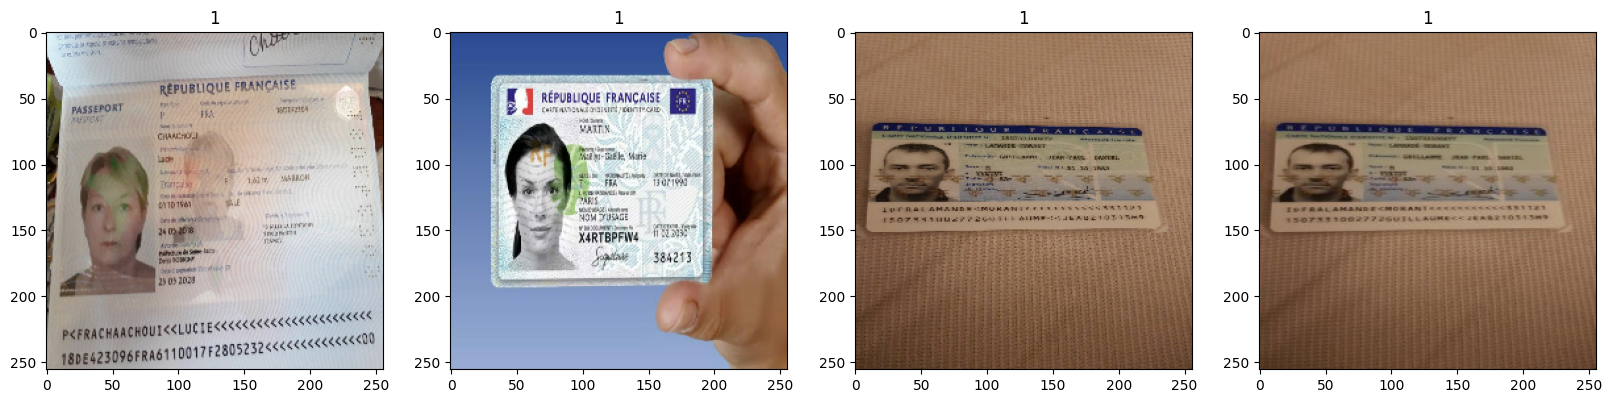

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[0.9490196 , 1.        , 1.        ],
          [0.9473346 , 0.998652  , 1.        ],
          [0.9396753 , 0.9925245 , 1.        ],
          ...,
          [0.9449142 , 0.9880515 , 1.        ],
          [0.9418505 , 0.98498774, 1.        ],
          [0.9411765 , 0.9843137 , 1.        ]],
 
         [[0.93014705, 0.98146445, 0.98449755],
          [0.9287227 , 0.9803481 , 0.9846134 ],
          [0.9222481 , 0.97527385, 0.98513997],
          ...,
          [0.93212366, 0.9749397 , 0.98737   ],
          [0.9293232 , 0.9724025 , 0.9875017 ],
          [0.9287071 , 0.9718444 , 0.98753065]],
 
         [[0.84436274, 0.897212  , 0.91403186],
          [0.8441231 , 0.89714885, 0.9146743 ],
          [0.8430341 , 0.8968616 , 0.9175944 ],
          ...,
          [0.87398463, 0.91534066, 0.9299611 ],
          [0.872381  , 0.915197  , 0.9306911 ],
          [0.8720282 , 0.9151654 , 0.9308517 ]],
 
         ...,
 
         [[0.91351104, 0.9331189 , 0.9448836 ],
          [0.91301

# 5. Split Data

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
train_size

14

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [19]:
train

<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0

# 7. Train

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
14/14 [==============================] - 14s 392ms/step - loss: 0.8213 - accuracy: 0.6317 - val_loss: 0.4136 - val_accuracy: 0.8203
Epoch 2/20
14/14 [==============================] - 5s 270ms/step - loss: 0.4684 - accuracy: 0.7857 - val_loss: 0.4022 - val_accuracy: 0.7969
Epoch 3/20
14/14 [==============================] - 5s 281ms/step - loss: 0.3127 - accuracy: 0.8527 - val_loss: 0.2745 - val_accuracy: 0.8984
Epoch 4/20
14/14 [==============================] - 5s 296ms/step - loss: 0.2045 - accuracy: 0.9219 - val_loss: 0.2158 - val_accuracy: 0.9375
Epoch 5/20
14/14 [==============================] - 5s 282ms/step - loss: 0.1423 - accuracy: 0.9420 - val_loss: 0.1211 - val_accuracy: 0.9609
Epoch 6/20
14/14 [==============================] - 5s 323ms/step - loss: 0.1369 - accuracy: 0.9554 - val_loss: 0.0714 - val_accuracy: 0.9688
Epoch 7/20
14/14 [==============================] - 5s 302ms/step - loss: 0.0835 - accuracy: 0.9732 - val_loss: 0.0487 - val_accuracy: 0.9766
Epoch

# 8. Plot Performance

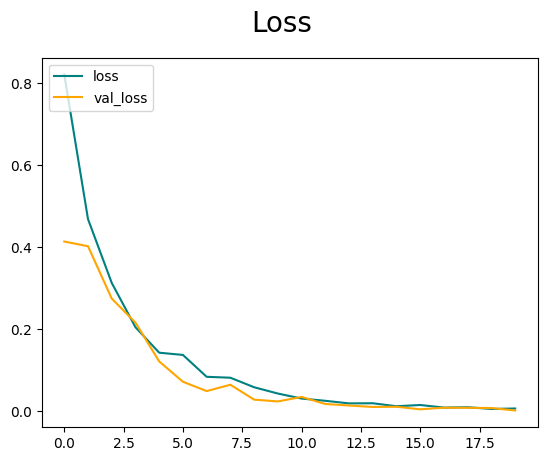

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

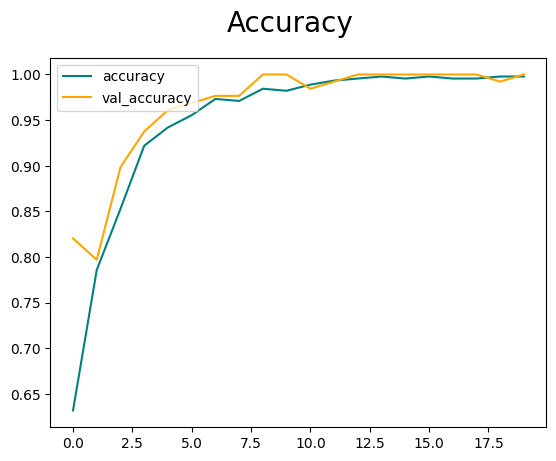

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [33]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [34]:
import cv2

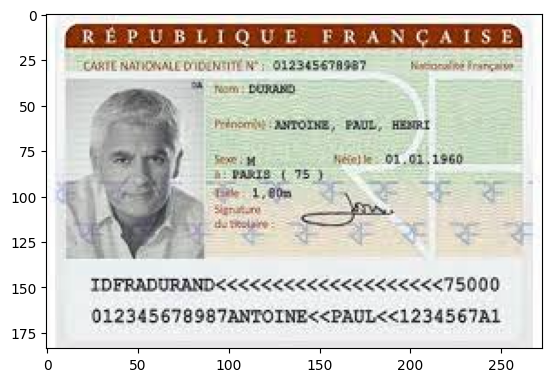

In [35]:
img = cv2.imread('cin france.jpg')
plt.imshow(img)
plt.show()

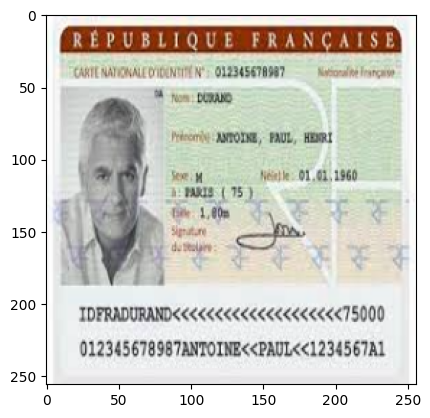

In [36]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [38]:
yhat

array([[0.9999999]], dtype=float32)

In [39]:
if yhat > 0.5: 
    print(f'Predicted class is CIN')
else:
    print(f'Predicted class is OTHERS')

Predicted class is CIN


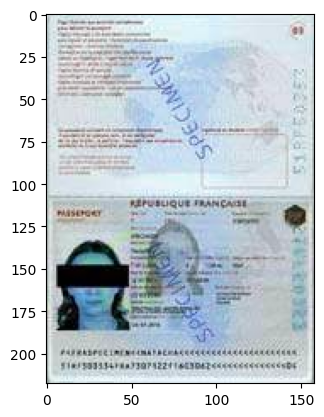

In [44]:
img1 = cv2.imread('passeport _fr.jpg')
plt.imshow(img1)
plt.show()

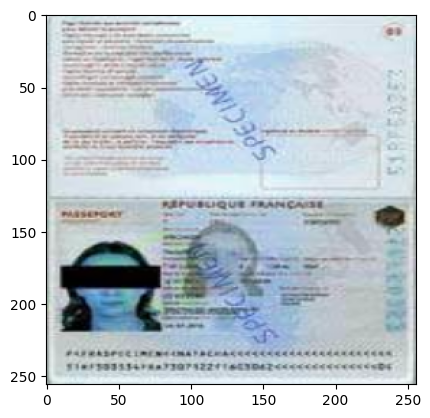

In [46]:
resize1 = tf.image.resize(img1, (256,256))
plt.imshow(resize1.numpy().astype(int))
plt.show()

In [61]:
yhat1 = model.predict(np.expand_dims(resize1/255, 0))

In [62]:
if yhat1 > 0.5: 
    print(f'Predicted class is CIN')
else:
    print(f'Predicted class is OTHERS')

Predicted class is CIN


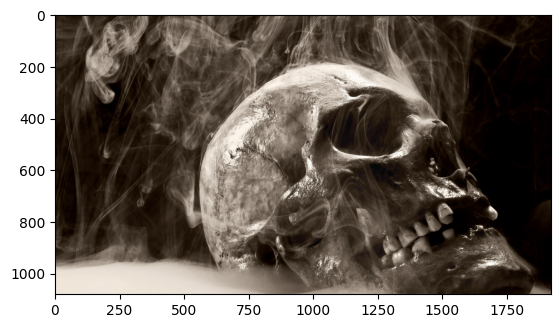

In [91]:
img2 = cv2.imread('img.jpg')
plt.imshow(img2)
plt.show()

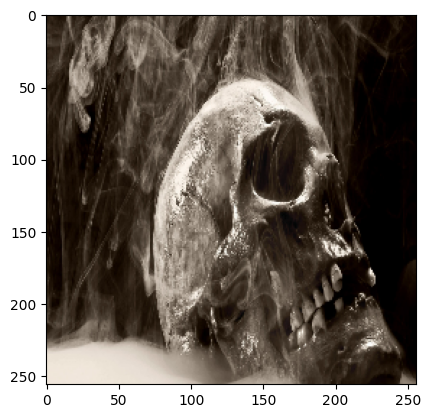

In [92]:
resize2 = tf.image.resize(img2, (256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [93]:
yhat2 = model.predict(np.expand_dims(resize2/255, 0))

In [94]:
if yhat2 > 0.5: 
    print(f'Predicted class is CIN')
else:
    print(f'Predicted class is OTHERS')

Predicted class is OTHERS


# 11. Save the Model

In [75]:
from tensorflow.keras.models import load_model

In [83]:
model.save("cinclassifier.h5")

In [88]:
model.save(os.path.join('models','cinclassifier.h5'))

In [89]:
new_model = load_model('C:\\Users\\MSI\\Desktop\\CNN - Cin\\ImageClassification\\models\\cinclassifier.h5')

In [90]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.9999999]], dtype=float32)